<a href="https://colab.research.google.com/github/Saritha199/CODSOFT/blob/machine-learning/sms_spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SMS SPAM DETECTION**

In [ ]:
import numpy as np
import pandas as pd
import nltk
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')f

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df = pd.read_csv('/content/spam.csv', encoding='ISO-8859-1', header=0)
df


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
df.dtypes

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

In [ ]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)


In [ ]:
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.isna().sum()

target    0
text      0
dtype: int64

In [ ]:
df['target'] = df['target'].map({
              'ham': 1,
              'spam': 0
              })
df

,target,text
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will Ì_ b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


In [ ]:
 #checking duplicate entries
print("Duplicate entries:", df.duplicated().sum())

Duplicate entries: 403


In [ ]:
df = df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['target'].value_counts()

target
1    4516
0     653
Name: count, dtype: int64

percentage of ham and spam


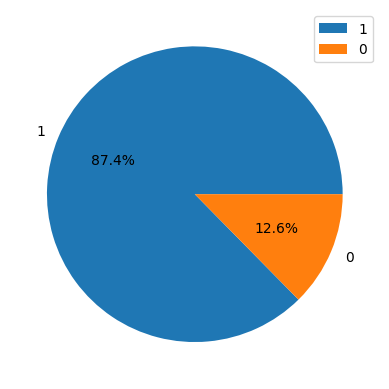

In [ ]:
# percentage of class present in target variable(target)
print("percentage of ham and spam")
labels=[1,0]
plt.pie(df['target'].value_counts(),labels=labels,autopct='%1.1f%%')
plt.legend(df['target'].value_counts().index)

In [ ]:
tweets = df.text
tweets

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5169, dtype: object

In [ ]:
from nltk import TweetTokenizer
tk = TweetTokenizer()
tweets = tweets.apply(lambda x: tk.tokenize(x)).apply(lambda x:' '.join(x))
tweets

0       Go until jurong point , crazy .. Available onl...
1                         Ok lar ... Joking wif u oni ...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor ... U c already then sa...
4       Nah I don't think he goes to usf , he lives ar...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568               Will Ì_ b going to esplanade fr home ?
5569    Pity , * was in mood for that . So ... any oth...
5570    The guy did some bitching but I acted like i'd...
5571                          Rofl . Its true to its name
Name: text, Length: 5169, dtype: object

In [ ]:
tweets = tweets.str.replace('[^a-zA-Z0-9]+', ' ')     # '+' is to replace the combination of special characters that come in a sentence.
tweets

0       Go until jurong point , crazy .. Available onl...
1                         Ok lar ... Joking wif u oni ...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor ... U c already then sa...
4       Nah I don't think he goes to usf , he lives ar...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568               Will Ì_ b going to esplanade fr home ?
5569    Pity , * was in mood for that . So ... any oth...
5570    The guy did some bitching but I acted like i'd...
5571                          Rofl . Its true to its name
Name: text, Length: 5169, dtype: object

In [ ]:
from nltk.tokenize import word_tokenize
tweets = tweets.apply(lambda x: ' '.join([w for w in word_tokenize(x) if len(w)>=3]))
tweets

0       until jurong point crazy Available only bugis ...
1                              lar ... Joking wif oni ...
2       Free entry wkly comp win Cup final tkts 21st M...
3              dun say early hor ... already then say ...
4         Nah n't think goes usf lives around here though
                              ...                        
5567    This the 2nd time have tried contact have won ...
5568                            Will going esplanade home
5569     Pity was mood for that ... any other suggestions
5570    The guy did some bitching but acted like inter...
5571                               Rofl Its true its name
Name: text, Length: 5169, dtype: object

In [ ]:
from nltk.stem import SnowballStemmer
st = SnowballStemmer('english')
tweets = tweets.apply(lambda x: [st.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x: ' '.join(x))
tweets

0       until jurong point crazi avail onli bugi great...
1                                lar ... joke wif oni ...
2       free entri wkli comp win cup final tkts 21st m...
3              dun say earli hor ... alreadi then say ...
4           nah n't think goe usf live around here though
                              ...                        
5567    this the 2nd time have tri contact have won th...
5568                                will go esplanad home
5569         piti was mood for that ... ani other suggest
5570    the guy did some bitch but act like interest b...
5571                                 rofl it true it name
Name: text, Length: 5169, dtype: object

In [ ]:
from nltk.corpus import stopwords
sw = stopwords.words('english')
tweets = tweets.apply(lambda x: [i for i in tk.tokenize(x) if i not in sw]).apply(lambda x: ' '.join(x))
tweets

0       jurong point crazi avail onli bugi great world...
1                                lar ... joke wif oni ...
2       free entri wkli comp win cup final tkts 21st m...
3                   dun say earli hor ... alreadi say ...
4                nah n't think goe usf live around though
                              ...                        
5567    2nd time tri contact 750 pound prize claim eas...
5568                                     go esplanad home
5569                            piti mood ... ani suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
data = vec.fit_transform(tweets)
data

<5169x7041 sparse matrix of type '<class 'numpy.float64'>'
	with 40604 stored elements in Compressed Sparse Row format>

In [ ]:
data.shape

(5169, 7041)

In [ ]:
y = df['target'].values
y

array([1, 1, 0, ..., 1, 1, 1])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, y, test_size=0.30, random_state=42)

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
bnb = BernoulliNB()
svm = SVC()
lr=LogisticRegression()
lst = [ bnb, svm, lr]

In [ ]:
for i in lst:
  print("Model:", i)
  i.fit(x_train, y_train)
  y_pred = i.predict(x_test)
  print(y_pred)
  print("Confusion matrix:", confusion_matrix(y_test, y_pred))
  print("Accuracy score:", accuracy_score(y_test, y_pred))
  print(classification_report(y_test, y_pred))
  print("*"*100)

Model: BernoulliNB()
[1 0 1 ... 1 1 1]
Confusion matrix: [[ 182   38]
 [   6 1325]]
Accuracy score: 0.9716312056737588
              precision    recall  f1-score   support

           0       0.97      0.83      0.89       220
           1       0.97      1.00      0.98      1331

    accuracy                           0.97      1551
   macro avg       0.97      0.91      0.94      1551
weighted avg       0.97      0.97      0.97      1551

****************************************************************************************************
Model: SVC()
[1 1 1 ... 1 1 1]
Confusion matrix: [[ 169   51]
 [   1 1330]]
Accuracy score: 0.9664732430689877
              precision    recall  f1-score   support

           0       0.99      0.77      0.87       220
           1       0.96      1.00      0.98      1331

    accuracy                           0.97      1551
   macro avg       0.98      0.88      0.92      1551
weighted avg       0.97      0.97      0.96      1551

***************